In [1]:
import pandas as pd
import numpy as np
import os
from lcfunctions import download_lasair_lc, display_lightcurve
from lcfunctions import lasair_clean, load_lasair_lc
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Generate dataset

In [2]:
label_scheme = 'labels_2'

pd.options.display.max_columns = None

dataset = pd.read_csv(f'../processed_data/dataset_allfeatures_inc_labels.csv', low_memory=False)
dataset = dataset[dataset[label_scheme].notna()].reset_index(drop=True)
print(dataset[label_scheme].value_counts())
print(dataset.shape)
pd.options.display.max_rows= None
missing = dataset.isnull().sum()/len(dataset)
missing.sort_values(ascending=False)



dwarf_nova_SU_UMa    630
dwarf_nova_Z_Cam     174
nova_like            144
nova_like_VY_Scl     120
dwarf_nova_U_Gem     116
polar                114
int_polar             49
AMCVn                 46
nova                  46
Name: labels_2, dtype: int64
(1439, 270)


CV_subsubtypes                       0.886727
nu_eff_used_in_astrometry            0.332870
CV_subtypes                          0.257123
absmag_rp                            0.194580
absmag_bp                            0.194580
absmag_g                             0.194580
FluxPercentileRatioMid50_g           0.191105
FluxPercentileRatioMid65_g           0.191105
FluxPercentileRatioMid80_g           0.191105
PercentDifferenceFluxPercentile_g    0.191105
FluxPercentileRatioMid65_r           0.191105
PercentDifferenceFluxPercentile_r    0.191105
FluxPercentileRatioMid80_r           0.191105
FluxPercentileRatioMid20_g           0.191105
FluxPercentileRatioMid50_r           0.191105
FluxPercentileRatioMid35_r           0.191105
FluxPercentileRatioMid35_g           0.191105
FluxPercentileRatioMid20_r           0.191105
parallax                             0.168867
distance                             0.168867
parallax_error                       0.168867
pm                                

In [3]:
dataset.columns.tolist()

['oid_ztf',
 'oid_aavso',
 'type_aavso',
 'Eclipsing',
 'CV_Types',
 'CV_subtypes',
 'CV_subsubtypes',
 'eclipse_clear',
 'manual_label',
 'Clarity',
 'labels_1',
 'labels_2',
 'labels_3',
 'labels_4',
 'Amplitude_g',
 'AndersonDarling_g',
 'Autocor_length_g',
 'Beyond1Std_g',
 'CAR_mean_g',
 'CAR_sigma_g',
 'CAR_tau_g',
 'Con_g',
 'Eta_e_g',
 'FluxPercentileRatioMid20_g',
 'FluxPercentileRatioMid35_g',
 'FluxPercentileRatioMid50_g',
 'FluxPercentileRatioMid65_g',
 'FluxPercentileRatioMid80_g',
 'Freq1_harmonics_amplitude_0_g',
 'Freq1_harmonics_amplitude_1_g',
 'Freq1_harmonics_amplitude_2_g',
 'Freq1_harmonics_amplitude_3_g',
 'Freq1_harmonics_rel_phase_1_g',
 'Freq1_harmonics_rel_phase_2_g',
 'Freq1_harmonics_rel_phase_3_g',
 'Freq2_harmonics_amplitude_0_g',
 'Freq2_harmonics_amplitude_1_g',
 'Freq2_harmonics_amplitude_2_g',
 'Freq2_harmonics_amplitude_3_g',
 'Freq2_harmonics_rel_phase_1_g',
 'Freq2_harmonics_rel_phase_2_g',
 'Freq2_harmonics_rel_phase_3_g',
 'Freq3_harmonics_amplit

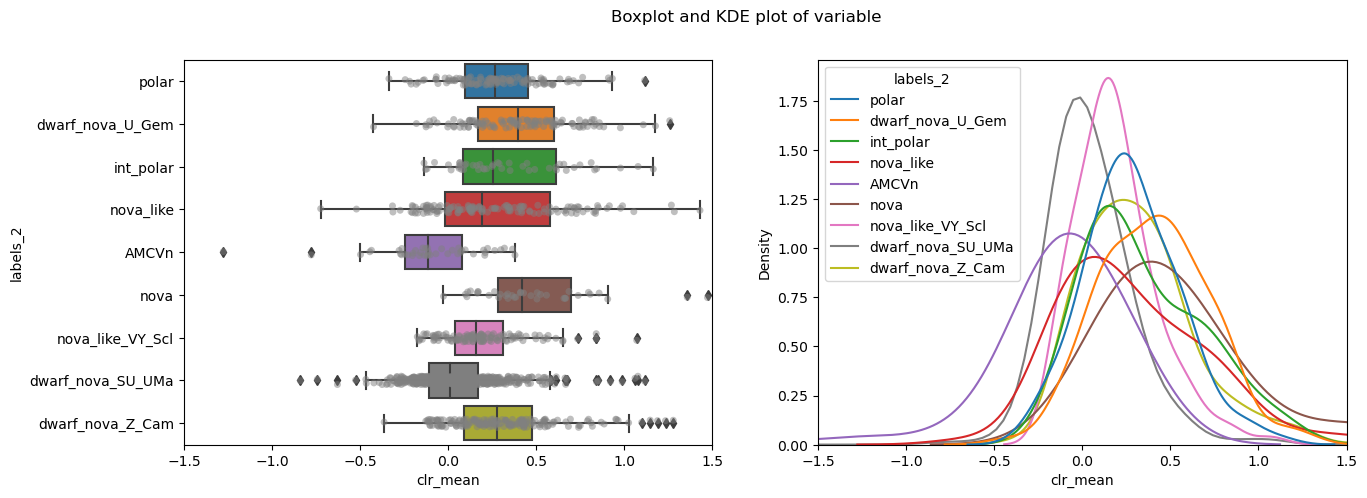

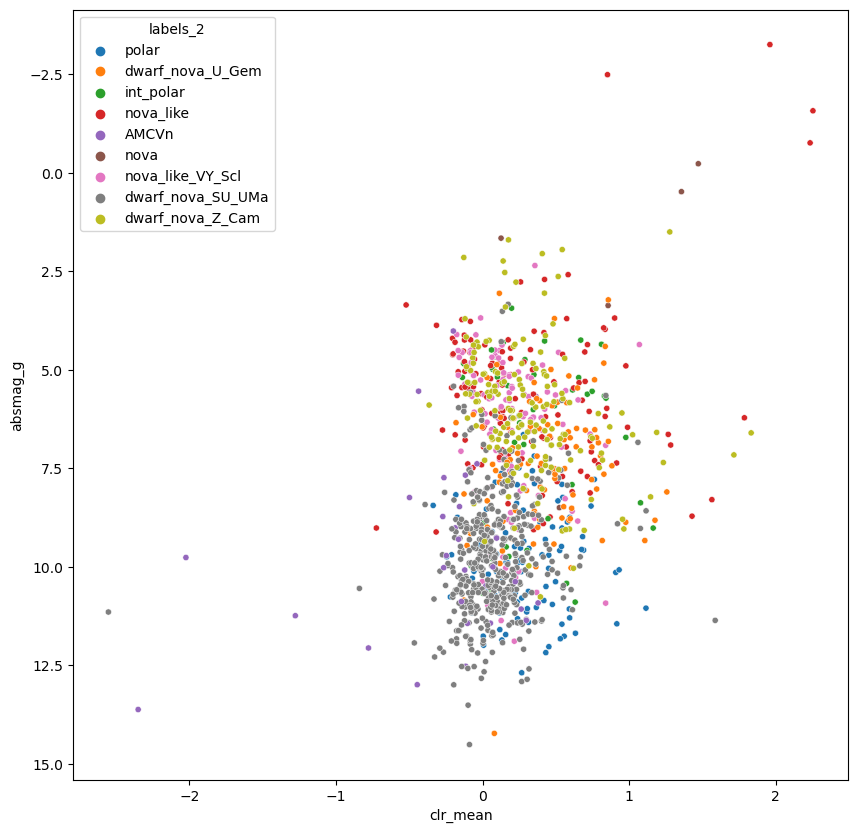

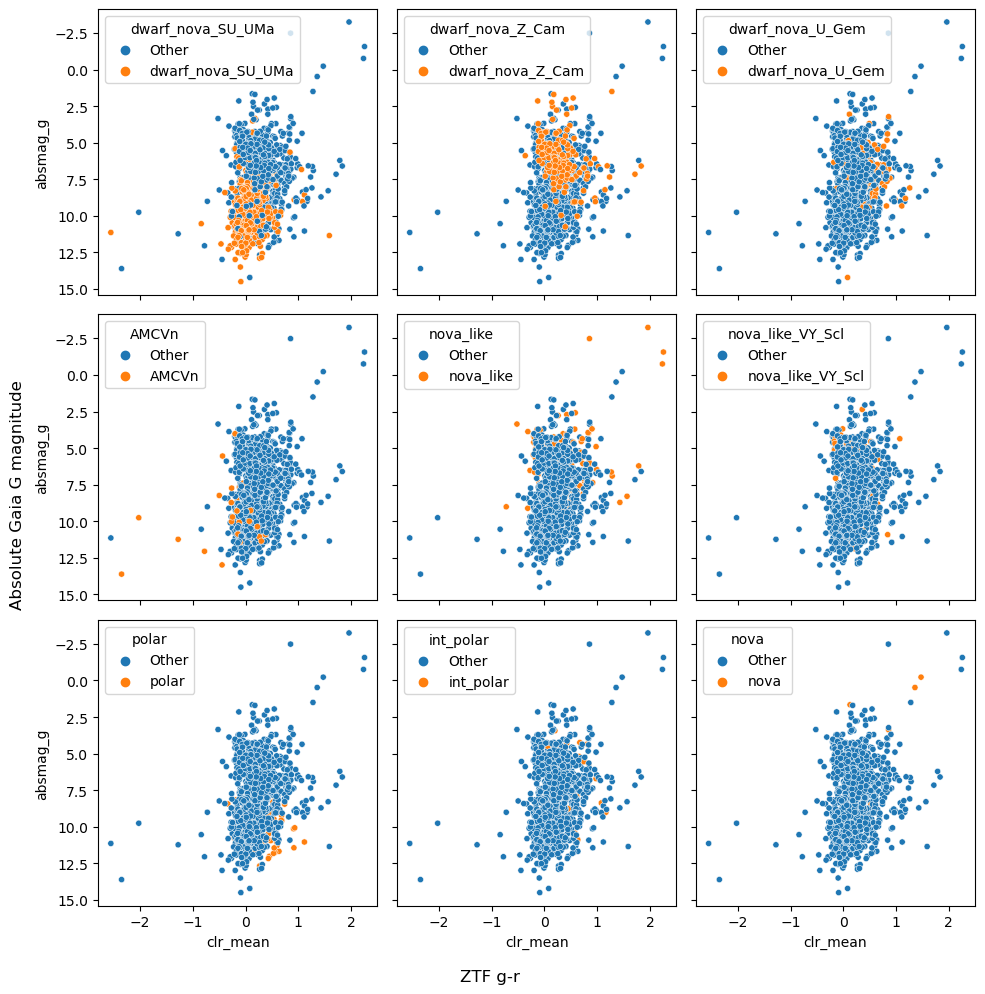

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
dataframe = dataset
name = 'clr_mean'
limits = (-1.5,1.5)
labels = 'labels_2'


fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Boxplot and KDE plot of variable')

sns.boxplot(ax=axes[0], data=dataframe, x=name, y=labels)
sns.stripplot(ax=axes[0], data=dataframe, x=name, y=labels, color='grey', alpha=0.5)
axes[0].set(xlim=limits)
sns.kdeplot(ax=axes[1], x=name, data=dataframe, hue=labels, common_norm=False)
axes[1].set(xlim=limits)
plt.show()


# dataframe[name].hist(bins=75, grid=False,figsize=(5,3))
fig2 = plt.figure(figsize=(10,10))
sns.scatterplot(data=dataframe, x='clr_mean', y='absmag_g', hue=labels, alpha=1,s=20)
#invert y axis
plt.gca().invert_yaxis()
plt.savefig(f'../figures/cmd_gminusr.pdf', bbox_inches='tight', format='pdf')
plt.show()

# Construct a figure of clr_mean vs absmag_g where the hue is for AM CVns stars and the remaining stars
# are plotted in grey. The figure is saved to a pdf file.
dataframe_ovr = dataset[['clr_mean','bp_rp','absmag_g', label_scheme]]
for cvclass in np.unique(dataframe_ovr[label_scheme]).tolist():
    dataframe_ovr.loc[(dataframe_ovr.labels_2.isin([cvclass])), cvclass] = cvclass
    dataframe_ovr.loc[(dataframe_ovr.labels_2.isin([cvclass]) == False), cvclass] = 'Other'

x = 'clr_mean'

fig3, ax = plt.subplots(nrows=3,ncols=3,figsize=(10,10), layout='tight', sharex=True, sharey=True)
fig3.supxlabel('ZTF g-r')
fig3.supylabel('Absolute Gaia G magnitude')
sns.scatterplot(ax=ax[0,0],data=dataframe_ovr, x=x, y='absmag_g', hue='dwarf_nova_SU_UMa', alpha=1,s=20)
ax[0,0].invert_yaxis()
sns.scatterplot(ax=ax[0,1],data=dataframe_ovr, x=x, y='absmag_g', hue='dwarf_nova_Z_Cam', alpha=1,s=20)
ax[0,1].invert_yaxis()
sns.scatterplot(ax=ax[0,2],data=dataframe_ovr, x=x, y='absmag_g', hue='dwarf_nova_U_Gem', alpha=1,s=20)
ax[0,2].invert_yaxis()
sns.scatterplot(ax=ax[1,0],data=dataframe_ovr, x=x, y='absmag_g', hue='AMCVn', alpha=1,s=20)
ax[1,0].invert_yaxis()
sns.scatterplot(ax=ax[1,1],data=dataframe_ovr, x=x, y='absmag_g', hue='nova_like', alpha=1,s=20)
ax[1,1].invert_yaxis()
sns.scatterplot(ax=ax[1,2],data=dataframe_ovr, x=x, y='absmag_g', hue='nova_like_VY_Scl', alpha=1,s=20)
ax[1,2].invert_yaxis()
sns.scatterplot(ax=ax[2,0],data=dataframe_ovr, x=x, y='absmag_g', hue='polar', hue_order=('Other','polar'),alpha=1,s=20)
ax[2,0].invert_yaxis()
sns.scatterplot(ax=ax[2,1],data=dataframe_ovr, x=x, y='absmag_g', hue='int_polar', alpha=1,s=20)
ax[2,1].invert_yaxis()
sns.scatterplot(ax=ax[2,2],data=dataframe_ovr, x=x, y='absmag_g', hue='nova', alpha=1,s=20)
ax[2,2].invert_yaxis()
plt.savefig(f'../figures/cmd_gminusr.pdf', bbox_inches='tight', format='pdf')
plt.show()


### Example light curves of different CV classes

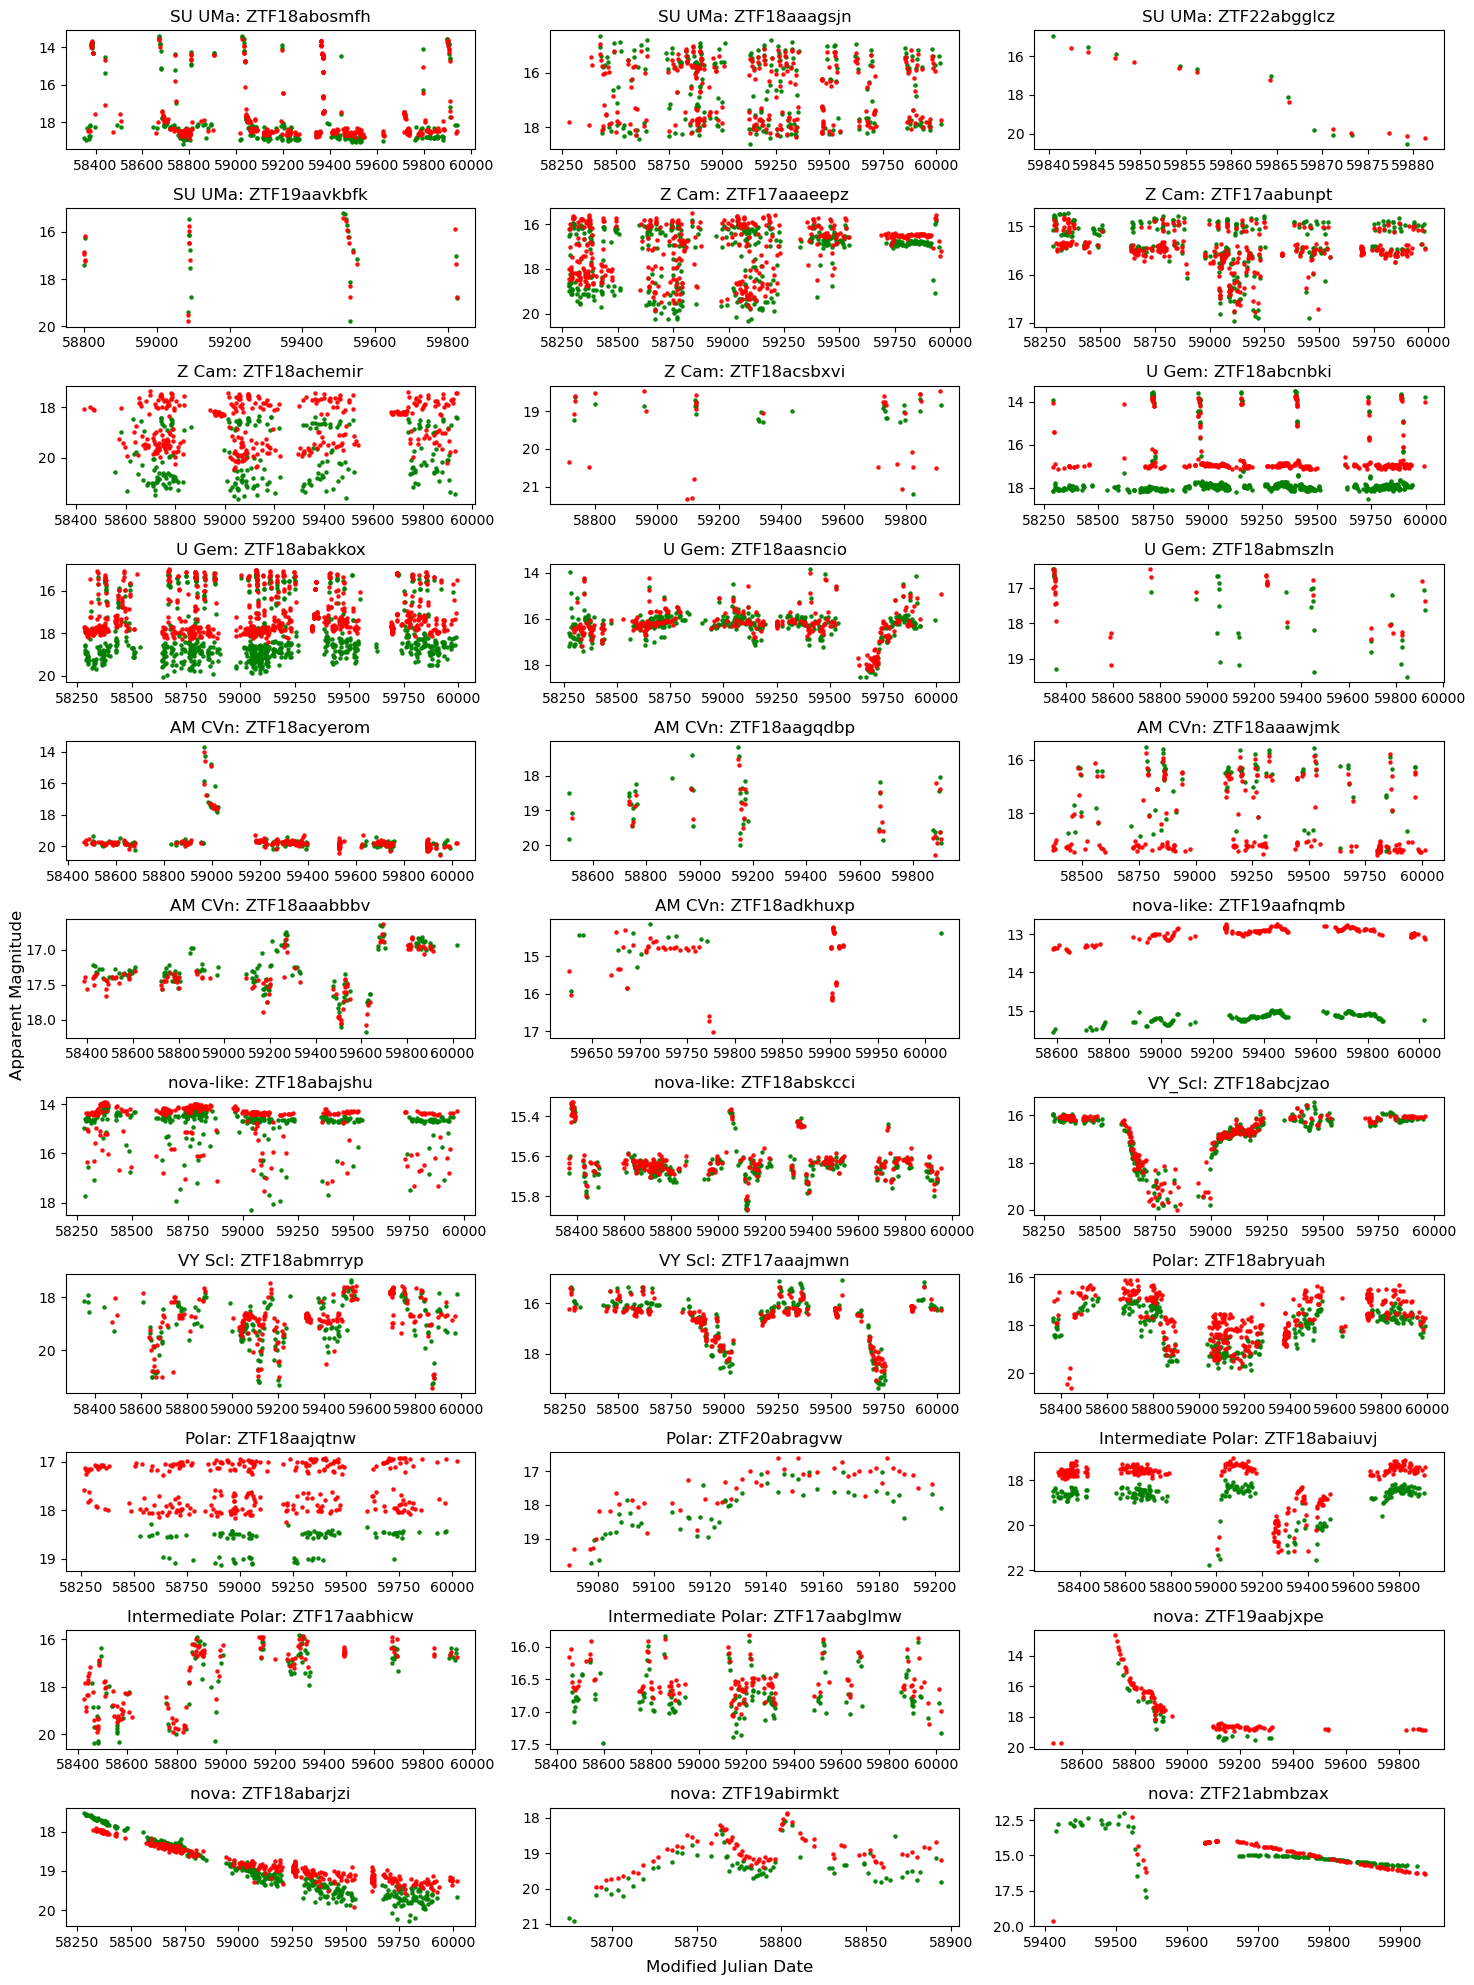

In [25]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter


fig, ax = plt.subplots(nrows=11,ncols=3,figsize=(15, 20), layout='tight')
fig.supxlabel('Modified Julian Date')
fig.supylabel('Apparent Magnitude')
s=5
fontsize = 10
alpha = 0.9

sources = np.array(['ZTF18abosmfh', 'ZTF18aaagsjn', 'ZTF22abgglcz',
                    'ZTF19aavkbfk', 'ZTF17aaaeepz', 'ZTF17aabunpt',
                    'ZTF18achemir', 'ZTF18acsbxvi', 'ZTF18abcnbki',
                    'ZTF18abakkox', 'ZTF18aasncio', 'ZTF18abmszln',
                    'ZTF18acyerom', 'ZTF18aagqdbp', 'ZTF18aaawjmk',
                    'ZTF18aaabbbv', 'ZTF18adkhuxp', 'ZTF19aafnqmb',
                    'ZTF18abajshu', 'ZTF18abskcci', 'ZTF18abcjzao',
                    'ZTF18abmrryp', 'ZTF17aaajmwn', 'ZTF18abryuah',
                    'ZTF18aajqtnw', 'ZTF20abragvw', 'ZTF18abaiuvj',
                    'ZTF17aabhicw', 'ZTF17aabglmw', 'ZTF19aabjxpe',
                    'ZTF18abarjzi', 'ZTF19abirmkt', 'ZTF21abmbzax'
                    ])

source_class = np.array(['SU UMa', 'SU UMa', 'SU UMa',
                         'SU UMa', 'Z Cam', 'Z Cam',
                         'Z Cam', 'Z Cam', 'U Gem',
                         'U Gem','U Gem','U Gem',
                         'AM CVn','AM CVn','AM CVn',
                         'AM CVn','AM CVn','nova-like',
                         'nova-like','nova-like','VY_Scl',
                         'VY Scl','VY Scl','Polar',
                         'Polar','Polar','Intermediate Polar',
                         'Intermediate Polar','Intermediate Polar','nova',
                         'nova','nova','nova'
                         ])

sources = sources.reshape(11,3)
source_class = source_class.reshape(11,3)


for row in range(11):
    for col in range(3):
        object = sources[row,col]
        try:
            lc_lasair = load_lasair_lc(object, path=f'../lightcurves_dataset/lasair_2023_03_25')
        except:
            # Create a folder within path for LCs if one does not exist
            if not os.path.exists(f'../lightcurves_dataset/lasair_non_dataset/cache'):
                os.makedirs(f'../lightcurves_dataset/lasair_non_dataset/cache')
            download_lasair_lc([object], folderpath=f'../lightcurves_dataset/lasair_non_dataset', cache=f'../lightcurves_dataset/lasair_non_dataset/cache')
            lc_lasair = load_lasair_lc(object, path=f'../lightcurves_dataset/lasair_non_dataset')
        
        lc_lasair_appmag = lasair_clean(lc_lasair, limit=25, magerrlim=1)
        
        lc_g = lc_lasair_appmag[lc_lasair_appmag['fid'] == 1]
        lc_r = lc_lasair_appmag[lc_lasair_appmag['fid'] == 2]
        ax[row,col].set_title(f'{source_class[row,col]}: {sources[row,col]}')
        ax[row,col].scatter(lc_g['jd']-2400000.5, lc_g['dc_mag'], c='green', s=s, label='g', alpha=alpha)
        ax[row,col].scatter(lc_r['jd']-2400000.5, lc_r['dc_mag'], c='red', s=s, label='r', alpha=alpha)
        ax[row,col].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        ax[row,col].invert_yaxis()


fig.savefig(f'../figures/class_lightcurves.pdf', bbox_inches='tight', format='pdf')
